# KKBOX Data

Data preparation

In [1]:
from sklearn import cross_validation, grid_search, metrics, ensemble
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
members = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\members.csv')
songs = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\songs.csv')
train = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\train.csv')

In [59]:
df = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\train.csv')

# 1% sample of items
df = df.sample(frac=0.01)

In [61]:
songs = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [62]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,en9ma/OM+X1cOFPI8RgE7Cxzj6h3gHS9tEbV4fmI9l4=,ufjl9/oJJRQx/0JUEBaIeyE82HP0CF7Fy2LwOIiNiYY=,my library,Local playlist more,local-library,1,188708,465,八三夭 (The Last Day of Summer 831),阿璞(八三夭),阿璞(八三夭),3.0,1,0,NaN,4,20161022,20161029
1,JVkXCLctrW+s34+psAMCzbK2ampdmarUWYWC5Gn+0HQ=,cLzTs6KmiPL8JTK2ukWrxP+JDj6BIJEGXyeISnnxmWs=,my library,Local playlist more,local-library,1,270942,465,陳雷,陳宏,陳宏,10.0,1,0,NaN,7,20110128,20171001
2,91J/ZoXnzZ5v0PH85pkD8XRZjsfLYTy082kHUO5nJFY=,QpDkltxG3823bIG3tFfQlvX5UBoMYdX7kF8j0H0Ktt4=,my library,Local playlist more,local-library,0,274599,465,郭采潔 (Amber Kuo),Guan Wei Tang,Hu Ru Hong,3.0,13,31,male,9,20051125,20180105
3,kan71ZA4MRa1qjytjk7yBurkhk5A8lGqGDe07ON3iDo=,bKqsVRkI9xyvZI7x96An8Lg4Ow+iaj310v4iwtFTdc8=,search,Album more,album,0,288763,465,Mariah Carey,Mariah Carey|James Wright,NaN,52.0,1,0,NaN,7,20150917,20171005
4,xk73CNHhT4j+oE8yxR438NApz29Rxl9MVWnapgjqQ+M=,rO8URjqVL17Igk96X8wH0m0nuXhvs5c3ZTABc5JQAek=,discover,Discover Genre,online-playlist,0,202187,444,Rania,NaN,NaN,31.0,13,31,female,4,20160616,20171003


In [39]:
test  =pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
msno                      73774 non-null object
song_id                   73774 non-null object
source_system_tab         73541 non-null object
source_screen_name        69484 non-null object
source_type               73573 non-null object
target                    73774 non-null int64
song_length               73773 non-null float64
genre_ids                 72569 non-null object
artist_name               73773 non-null object
composer                  56852 non-null object
lyricist                  41800 non-null object
language                  73773 non-null float64
city                      73774 non-null int64
bd                        73774 non-null int64
gender                    44205 non-null object
registered_via            73774 non-null int64
registration_init_time    73774 non-null int64
expiration_date           73774 non-null int64
dtypes: float64(2), int64(6), o

In [5]:
# Count Na in %
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.315829
source_screen_name         5.815057
source_type                0.272454
target                     0.000000
song_length                0.001355
genre_ids                  1.633367
artist_name                0.001355
composer                  22.937620
lyricist                  43.340472
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.080516
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [6]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [12]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [16]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,7505,6334,3,7,4,1,307200.0,141,5648,9469,...,1,9,3418,580,2016,6,27,2017,9,24
1,15149,25519,5,12,7,0,275748.0,141,5849,5468,...,0,9,3573,590,2017,1,1,2017,10,4
2,15687,13943,3,7,3,0,237122.0,37,180,326,...,2,4,3227,611,2015,11,16,2017,10,25
3,6828,13493,3,18,10,0,221753.0,141,6144,7692,...,0,3,2876,580,2014,11,29,2017,9,24
4,15691,13470,0,2,6,1,215144.0,139,5087,8062,...,1,4,3261,586,2015,12,20,2017,9,30


In [14]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

important code section ,it transform data type from objcet to category, so it can use cat.code . it seems like scikit-learn preprocessing

In [15]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

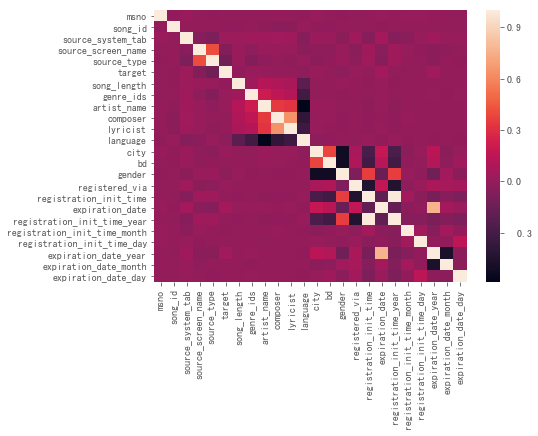

In [17]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [18]:
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)

In [19]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

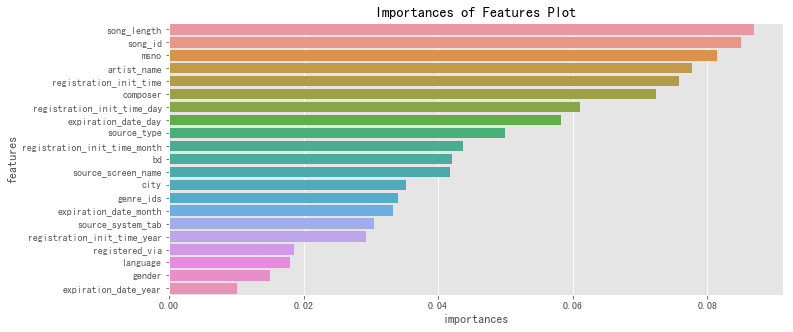

In [21]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [22]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [85]:
len(train_data.msno.unique())

9156

In [23]:
df.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [75]:
#clean outlier data in bd
train_data=train_data.drop(train_data[(train_data.bd>100) | (train_data.bd<=0)].index,0)

In [83]:
len(train_data['artist_name'].unique())

4213

In [76]:
train_data.head()

,msno,song_id,source_screen_name,source_type,song_length,artist_name,composer,bd,registration_init_time,registration_init_time_month,registration_init_time_day,expiration_date_day
17601,12428,2766,7,3,209215.0,1330,5460,32,1728,6,8,9
72274,12768,9180,13,6,322664.0,6568,9739,34,1631,3,3,21
37067,7955,10250,7,3,240930.0,6360,1558,26,1578,1,9,30
73743,67,2575,7,3,261503.0,5455,7692,20,3201,10,21,20
18982,3543,5095,7,3,279846.0,6167,1196,20,2119,10,27,8


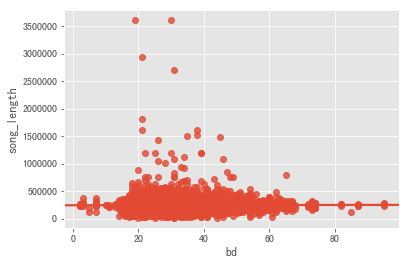

In [81]:
sns.regplot(x=train_data['bd'],y=train_data['song_length'])

XGBOOST

In [24]:
# Train & Test split
target = df.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(df, target, test_size = 0.3)

# Delete df
del df

test for the best parameter

In [25]:
# Create model

model = xgb.XGBClassifier()

# Create parameters grid

parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }

# Strategy of cross validation

cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 3, test_size = 0.3)

# Create Grid search Strategy

grid_cv = grid_search.RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)

# Fit model by Grid

grid_cv.fit(train_data, train_labels)



AttributeError: 'RandomizedSearchCV' object has no attribute 'bestestimator'

In [27]:
# Model with the best estimator

grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
# Create model
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=150)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=10, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
predict_labels = model.predict(test_data)

In [30]:
print(metrics.classification_report(test_labels, predict_labels))

             precision    recall  f1-score   support

          0       0.62      0.59      0.60     10962
          1       0.62      0.65      0.63     11171

avg / total       0.62      0.62      0.62     22133



In [45]:
from collections import Counter

In [43]:
test_test  =pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\test.csv')

In [39]:
test_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [40]:
for i in test_test.select_dtypes(include=['object']).columns:
    test_test[i][test_test[i].isnull()] = 'unknown'
test_test = test_test.fillna(value=0)
# Create Dates

# registration_init_time
#test_test.registration_init_time = pd.to_datetime(test_test.registration_init_time, format='%Y%m%d', errors='ignore')
#test_test['registration_init_time_year'] = test_test['registration_init_time'].dt.year
#test_test['registration_init_time_month'] = test_test['registration_init_time'].dt.month
#test_test['registration_init_time_day'] = test_test['registration_init_time'].dt.day

# expiration_date
#test_test.expiration_date = pd.to_datetime(test_test.expiration_date,  format='%Y%m%d', errors='ignore')
#test_test['expiration_date_year'] = test_test['expiration_date'].dt.year
#test_test['expiration_date_month'] = test_test['expiration_date'].dt.month
#test_test['expiration_date_day'] = test_test['expiration_date'].dt.day
# Dates to categoty
#df['registration_init_time'] = df['registration_init_time'].astype('category')
#df['expiration_date'] = df['expiration_date'].astype('category')
# Object data to category
for col in test_test.select_dtypes(include=['object']).columns:
    test_test[col] = test_test[col].astype('category')
    
# Encoding categorical features
for col in test_test.select_dtypes(include=['category']).columns:
    test_test[col] = test_test[col].cat.codes